# Customer Churn Case for classification task

Binary Classification task  - since y can take 0 or 1:
- 1 - positive (Churn)
- 2 - negative (Not Churn (stay))

g(xi) = 0-1 (likelihood of churn)

we take customers from last month, and we know whether they left or not

### Dataset:  
we will use Telco Customer Churn dataset from Kaggle competition:  
[Telco Customer Churn](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

# Data Preparation

In [119]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score

In [120]:
df = pd.read_csv('./data/churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [121]:
# to take a look at the Whole DF we can transpose DF:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


We see that the column names and string values in table are not uniform (sometimes they are lower case, spaces in some values and dash in others)  
therefore, we may make it uniform:

In [122]:
# change all column names to lower case and change spaces to _
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [123]:
# for all categorical variables we will do the same:
categorical_variables = list(df.dtypes[df.dtypes == 'object'].index)

for variable in categorical_variables:
    df[variable] = df[variable].str.lower()
    df[variable] = df[variable].str.replace(' ', '_')

In [124]:
df.head(7).T

,0,1,2,3,4,5,6
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc,1452-kiovk
gender,female,male,male,male,female,female,male
seniorcitizen,0,0,0,0,0,0,0
partner,yes,no,no,no,no,no,no
dependents,no,no,no,no,no,no,yes
tenure,1,34,2,45,2,8,22
phoneservice,no,yes,yes,no,yes,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes,yes
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no,no


In [125]:
# now let's take a look at data types in columns:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

we can see that "seniorcitizen" variable is Integer (0-1 values), nevertheless it is categorical  
also "totalcharges" is an object, it should be a number!  

so let's take a closer look at these columns:

In [126]:
df.totalcharges.head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: totalcharges, dtype: object

so it is looks like a numerical feature, but it is an object datatype, so probably some of values are not numbers

In [127]:
try:
    pd.to_numeric(df.totalcharges)
except:
    print('Unable to parse "_"')

Unable to parse "_"


We can see '_' sign in this column, it arised probably since we replaced Space signs with _ and we treated this column as a categorical, since it contained Spaces, so now we need to clean this data

In [128]:
# so we can use "errors" parameter to let pandas convert such cases into NAN values:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
# fillna with 0
df.totalcharges = df.totalcharges.fillna(0)

In [129]:
# now let's look at target variable (churn):
df.churn.head(4)

0     no
1     no
2    yes
3     no
Name: churn, dtype: object

to apply ML algorithm to solve classification task we need to convert this values into Binary format (1-0)

In [130]:
# replace 'yes' values with 1 and others with zero:
df.churn = (df.churn =='yes').astype('int')

In [131]:
df.head(6).T

,0,1,2,3,4,5
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu,9305-cdskc
gender,female,male,male,male,female,female
seniorcitizen,0,0,0,0,0,0
partner,yes,no,no,no,no,no
dependents,no,no,no,no,no,no
tenure,1,34,2,45,2,8
phoneservice,no,yes,yes,no,yes,yes
multiplelines,no_phone_service,no,no,no_phone_service,no,yes
internetservice,dsl,dsl,dsl,dsl,fiber_optic,fiber_optic
onlinesecurity,no,yes,yes,yes,no,no


# Setting up the Validation framework

- we will Split initial data into train/validation/test using Scikit-Learn library

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [134]:
# splits data into 2 parts:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print(f'full_train part: {len(df_full_train)}, test_part: {len(df_test)}')

# split full train into train and validation:
df_train, df_val = train_test_split(df_full_train, test_size=0.2, random_state=1)
print(f'train part: {len(df_train)}, val part: {len(df_val)}, test part : {len(df_test)}')

full_train part: 5634, test_part: 1409
train part: 4507, val part: 1127, test part : 1409


we see that the size of Validation dataset is smaller then the size of Test, since we Stated 20% in second split, however this will be 20% of df_full_train and not from intital data, to know how to make them of the same size, we can calculate it as follows: (what is 20 % of 80% = 25%)

In [135]:
# splits data into 2 parts:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
print(f'full_train part: {len(df_full_train)}, test_part: {len(df_test)}')

# split full train into train and validation:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1) # 25 % of full_train (20 of total)
print(f'train part: {len(df_train)}, val part: {len(df_val)}, test part : {len(df_test)}')

full_train part: 5634, test_part: 1409
train part: 4225, val part: 1409, test part : 1409


In [136]:
# reset index:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [137]:
# separate target variable:
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values
# drop target from main dataset:
del df_train['churn']
del df_val['churn']
del df_test['churn']

we did not delete target variable from df_full_train dataset, since we will take a look at it's distribution in Exploratory Data Analysis

# EDA (Exploratory Data Analysis)

- check missing values
- look at the target variable (churn)
- Look at numerical and categorical variables

In [138]:
df_full_train = df_full_train.reset_index(drop=True)

In [139]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0


In [140]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

We do not have any missing values right now, we only had them in "totalcharges" column and replaced them by 0

In [141]:
# let's take a look at what is the proportion between classes:
n = len(df_full_train)
print(df_full_train.churn.value_counts())
print(df_full_train['churn'].value_counts(normalize=True)) # %

0    4113
1    1521
Name: churn, dtype: int64
0    0.730032
1    0.269968
Name: churn, dtype: float64


Churn Rate = 27 % 

In [142]:
# we can also calculate Churn Rate by simply calculate Mean of Binary Target variable:
global_churn_rate = round(df_full_train['churn'].mean(), 3)
print(f'Global Churn Rate = {global_churn_rate}') # CR in the entire dataset

Global Churn Rate = 0.27


Now let's look at the Numerical and Categorical variables

In [143]:
# numerical variables:
df_full_train.dtypes[df_full_train.dtypes != 'object']

seniorcitizen       int64
tenure              int64
monthlycharges    float64
totalcharges      float64
churn               int32
dtype: object

but as we said not all of them are actually numeric, only:

In [144]:
# numerical variables:
numerical = [
    'tenure',
    'monthlycharges',
    'totalcharges'
]

In [145]:
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [146]:
# categorical (the rest columns)
categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod'
    ]

In [147]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

So we can see that some of categorical variables are Binary, others have 3 different values and "paymentmethod" has 4 distinct values

# Feature Importance: Churn rate and risk ratio

Feature Importance Analysis (part of EDA) - identifying which Features affect our target variable
- Churn Rate 
- Risk Ratio
- Mutual information 

to understand how important different features are for classifying User, we should consider main Metrics by different categories within each Categorical Variable

### Churn Rate  
- Churn Rate

In [148]:
# look at the Churn Rate within each group:
churn_female = round(df_full_train[df_full_train['gender'] == 'female'].churn.mean(), 3)
churn_male = round(df_full_train[df_full_train['gender'] == 'male'].churn.mean(), 3)

print(f'Churn rate (female) = {churn_female}')
print(f'Churn rate (male) = {churn_male}')
print(f'Global Churn Rate = {global_churn_rate}')

Churn rate (female) = 0.277
Churn rate (male) = 0.263
Global Churn Rate = 0.27


We can see that the Churn Rate for Male and Female users is not very different from Global CR

In [149]:
# we can do the same for other variables, for example Partner:
df_full_train.partner.value_counts()

no     2932
yes    2702
Name: partner, dtype: int64

In [150]:
partner_yes = round(df_full_train[df_full_train['partner'] == 'yes']['churn'].mean(), 3)
partner_no = round(df_full_train[df_full_train['partner'] == 'no']['churn'].mean(), 3)
print(f'Churn Partner_yes = {partner_yes}, which is {round(abs(partner_yes - global_churn_rate),3)} different from Global CR')
print(f'Churn Partner_no = {partner_no}, which is {round(abs(partner_no - global_churn_rate),3)} different from Global CR')
print(f'Global Churn Rate = {global_churn_rate}')

Churn Partner_yes = 0.205, which is 0.065 different from Global CR
Churn Partner_no = 0.33, which is 0.06 different from Global CR
Global Churn Rate = 0.27


Here the difference is significant, therefore we can guess that the Partner Variable is more important then the Gender feature

#### Measure Feature importance:  
- we may measure feature importance by calculating the difference between Global CR and CR within the groups, the higher the difference the more important our feature is for Classification
- instead of looking at the difference we can divide one by another: (Risk ratio)

## Risk Ratio  
- Risk Ratio = Group CR / Global CR

In [151]:
# divide CR for Users without Partner:
partner_no / global_churn_rate

1.222222222222222

Value is > 1, therefore customers without Partners are more likely to Churn

We can visualize it:

<AxesSubplot:xlabel='group', ylabel='churn_rate'>

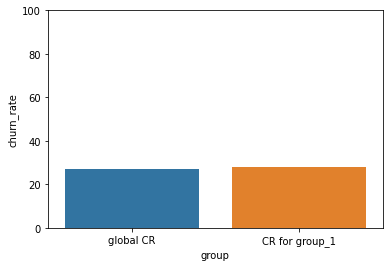

In [152]:
df_vis_1 = pd.DataFrame({
    'group': ['global CR', 'CR for group_1'],
    'churn_rate': [27,28]
})
plt.ylim(0, 100)
sns.barplot(data = df_vis_1, x='group', y='churn_rate')

In this Plot we can see that the churn rate for group_1 is only 1 % higher than the average (Global), therefore we can say that there is the Same Risk for people from this group to Churn

<AxesSubplot:xlabel='group', ylabel='churn_rate'>

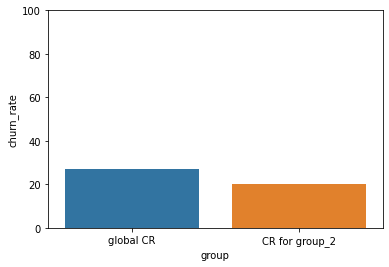

In [153]:
# for higher difference it would look like that:
df_vis_2 = pd.DataFrame({
    'group': ['global CR', 'CR for group_2'],
    'churn_rate': [27, 20],
    'color': ['blue', 'red']
})
plt.ylim(0, 100)
sns.barplot(data = df_vis_2, x='group', y='churn_rate')

This group of people is less likely to churn (Low Risk)

<AxesSubplot:xlabel='group', ylabel='churn_rate'>

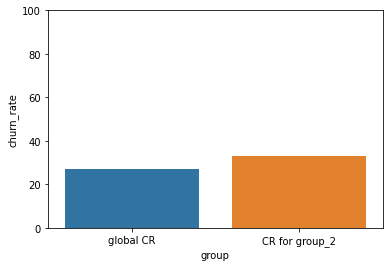

In [154]:
# high risk:
# for higher difference it would look like that:
df_vis_3 = pd.DataFrame({
    'group': ['global CR', 'CR for group_2'],
    'churn_rate': [27, 33],
    'color': ['blue', 'red']
})
plt.ylim(0, 100)
sns.barplot(data = df_vis_3, x='group', y='churn_rate')

High Risk for people from this group

To make this type of analysis faster and more convenient, we can use grouping

that is how this would look in SQL

In [155]:
'''
SELECT  
    gender,  
    AVG(churn),  
    AVG(churn) - global_churn AS diff,  
    AVG(churn) - global_churn AS risk  
FROM data  
GROUP BY  
    gender  
'''

'\nSELECT  \n    gender,  \n    AVG(churn),  \n    AVG(churn) - global_churn AS diff,  \n    AVG(churn) - global_churn AS risk  \nFROM data  \nGROUP BY  \n    gender  \n'

In [156]:
df_group = df_full_train.groupby('gender').churn.agg(['mean', 'count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


In [157]:
# to display result from the loop we can use "display" function:
from IPython.display import display

In [158]:
# now we can do the same for each categorical variable:
for category in categorical:
    print(category)
    df_group = df_full_train.groupby(category).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)

gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006824,1.025274
male,0.263214,2838,-0.006786,0.974865


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027730,0.897297
1,0.413377,912,0.143377,1.531027


partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059809,1.221515
yes,0.205033,2702,-0.064967,0.759383


dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043760,1.162074
yes,0.165666,1666,-0.104334,0.613579


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028684,0.893764
yes,0.273049,5087,0.003049,1.011292


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012593,0.953361
no_phone_service,0.241316,547,-0.028684,0.893764
yes,0.290742,2387,0.020742,1.076820


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077653,0.712398
fiber_optic,0.425171,2479,0.155171,1.574709
no,0.077805,1221,-0.192195,0.288167


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150921,1.558967
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.153226,1612,-0.116774,0.567503


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134323,1.497494
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.217232,1915,-0.052768,0.804564


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125875,1.466205
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.230412,1940,-0.039588,0.853379


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148914,1.551534
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.159926,1632,-0.110074,0.592320


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072832,1.269747
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.302723,2167,0.032723,1.121195


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068906,1.255209
no_internet_service,0.077805,1221,-0.192195,0.288167
yes,0.307273,2200,0.037273,1.138047


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161701,1.598893
one_year,0.120573,1186,-0.149427,0.446568
two_year,0.028274,1344,-0.241726,0.104718


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097929,0.637300
yes,0.338151,3321,0.068151,1.252412


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101829,0.622854
credit_card_(automatic),0.164339,1217,-0.105661,0.608661
electronic_check,0.455890,1893,0.185890,1.688482
mailed_check,0.193870,1305,-0.076130,0.718036


By looking into the Group risk we may have guess what features are more or less important for Classification Task, However it would be good to have measure that describes what feature is more important than the others

# Mutual Information  
- Mutual information - concept from information theory, it tells us what we can learn about one variable if we know the value of another. It is a measure of inner dependance

How much do we learn about churn from knowing information about Contract_type?

In [159]:
from sklearn.metrics import mutual_info_score

In [160]:
mutual_info_score(df_full_train['churn'], df_full_train['contract']) # the order of variables is not playing role

0.0983203874041556

In [161]:
mutual_info_score(df_full_train['churn'], df_full_train['gender']) # the order of variables is not playing role

0.0001174846211139946

So Gender is Not Informative

In [162]:
mutual_info_score(df_full_train['churn'], df_full_train['partner']) # the order of variables is not playing role

0.009967689095399745

we can see that Partner variable is more important then Gender, but far less more important then Contract type feature

we can not say some absolute information from this value, but we can use it for comparison, what features are more important than the others

In [163]:
# function mutual_info
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train['churn'])

In [164]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

So, we can see that the Contract is the most important variable, when the Gender is the least important variable

# Feature importance (numerical variables): Correlation  
- Correlation coefficient - it is a measure of dependance between 2 variables

x and y features are numbers  
correlation coefficient is between -1 and 1

but in our Task - y is binary variable, therefore  
positive correlation means (x increases, more y positive)

In [165]:
# correlation between numerical variables and Churn:
df_full_train[numerical].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

Negative coefficient may be interpreted as when "tenure" increases customer is less likely to churn

And logically, the higher the monthly charges are the higher the probability for customer to churn

In [166]:
# we can see this if we calculate Churn Rate for customers who are with the company for less then 2 month
CR_2_m = df_full_train[df_full_train.tenure <= 2]['churn'].mean()

# Churn Rate for customers who are with the company for period 2-12 months:
CR_2_12_m = df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <= 12)]['churn'].mean()

# CR for period > 1 year:
CR_12_m = df_full_train[(df_full_train.tenure > 12)]['churn'].mean()

print(f'CR tenure <2 months = {round(CR_2_m, 4)}')
print(f'CR tenure 2-12 months = {round(CR_2_12_m, 4)}')
print(f'CR tenure >12 months = {round(CR_12_m, 4)}')

CR tenure <2 months = 0.5953
CR tenure 2-12 months = 0.3994
CR tenure >12 months = 0.1763


we can see that CR for such customers is higher then the Global CR

still pretty high

<AxesSubplot:xlabel='Period', ylabel='Churn Rate'>

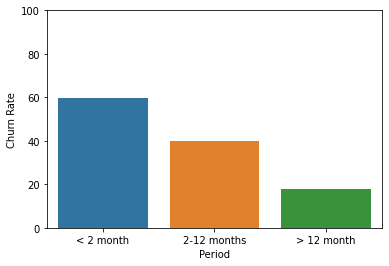

In [167]:
# visualiza the trend:
df_vis = pd.DataFrame({
    'Churn Rate': [CR_2_m*100, CR_2_12_m* 100, CR_12_m* 100],
    'Period': ['< 2 month', '2-12 months', '> 12 month']
})

plt.ylim(0, 100)
sns.barplot(data=df_vis, x='Period', y='Churn Rate')

We can obviously see the decreasing trend

In [168]:
# monthly charges:
CR_less_20 = df_full_train[df_full_train.monthlycharges <= 20]['churn'].mean()
CR_20_50 = df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <= 50)]['churn'].mean()
CR_50 = df_full_train[(df_full_train.monthlycharges > 50)]['churn'].mean()

print(f'CR tenure <2 months = {round(CR_less_20, 4)}')
print(f'CR tenure 2-12 months = {round(CR_20_50, 4)}')
print(f'CR tenure >12 months = {round(CR_50, 4)}')

CR tenure <2 months = 0.088
CR tenure 2-12 months = 0.1834
CR tenure >12 months = 0.325


<AxesSubplot:xlabel='Monthly Charges', ylabel='Churn Rate'>

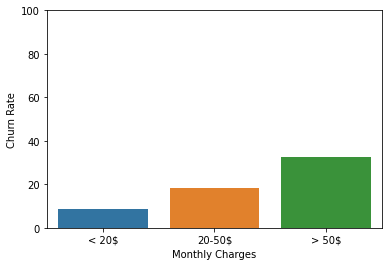

In [169]:
# visualiza the trend:
df_vis = pd.DataFrame({
    'Churn Rate': [CR_less_20*100, CR_20_50* 100, CR_50* 100],
    'Monthly Charges': ['< 20$', '20-50$', '> 50$']
})

plt.ylim(0, 100)
sns.barplot(data=df_vis, x='Monthly Charges', y='Churn Rate')

We can see the opposite trend, that with increase of Monthly charges trend is positive

# One-hot encoding  
- one-hot encoding is when we separate multicategorical features into several Binary features

We will use Scikit-Learn to encode categorical features

![](./pic/1.png)

Name comes from:
hot - 1, comes from electronics where when there is a currency, connector is hot

In [170]:
from sklearn.feature_extraction import DictVectorizer

In [171]:
# let's take a look at the 2 columns with categorical variables:
df_train[['gender', 'contract']].iloc[:10]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
5,male,month-to-month
6,male,month-to-month
7,female,month-to-month
8,female,two_year
9,female,month-to-month


In [172]:
# now we can convert these columns into Dictionary:
df_train[['gender', 'contract']].iloc[:5].to_dict()

{'gender': {0: 'female', 1: 'male', 2: 'female', 3: 'female', 4: 'female'},
 'contract': {0: 'two_year',
  1: 'month-to-month',
  2: 'month-to-month',
  3: 'month-to-month',
  4: 'two_year'}}

but if we do it in that way, we would convert each column into Dictionary, but we need to do it Row-wise

In [173]:
dicts = df_train[['gender', 'contract']].iloc[:5].to_dict(orient='records')
dicts

[{'gender': 'female', 'contract': 'two_year'},
 {'gender': 'male', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'month-to-month'},
 {'gender': 'female', 'contract': 'two_year'}]

so we produced a list of dictionaries for each row, and now DictVectorizor will help us with:

In [174]:
dv = DictVectorizer() # object of class DictVectorizer
dv.fit(dicts) # train vectorizer

DictVectorizer()

In [175]:
dv.transform(dicts)

<5x4 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

Sparse Matrix is used here to store data, which contains many 0 values

But for later work we need usual numpy array, therefore we state this in the parameter:

In [176]:
dicts = df_train[['gender', 'contract']].iloc[:100].to_dict(orient='records') # take more records to have all categories presented
dv = DictVectorizer(sparse=False) #sparse=False to create np.array after transformation 
dv.fit(dicts) # train vectorizer
dv.transform(dicts)[:5] # transform the data 

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.]])

we can see that DictVectorizer produced 5 columns (2 for gender and 3 for contract features)  
then we can see what columns are actually produced for what features:

In [177]:
# get feature names:
dv.get_feature_names()

C:\Users\z004ejty\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'gender=female',
 'gender=male']

And what is very nice about DiceVectorizer, is that it is smart enough to understand that the column is Numerical and do not convert it:

In [178]:
# pass numeric and categorical variables into DictVectorizer:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:100].to_dict(orient='records') # take more records to have all categories presented
dv = DictVectorizer(sparse=False) #sparse=False to create np.array after transformation 
dv.fit(dicts) # train vectorizer
dv.transform(dicts)[:5] # transform the data 

array([[ 0.,  0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  0.,  1.,  0.,  5.],
       [ 0.,  0.,  1.,  1.,  0., 18.]])

In [179]:
# train dictionaries:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
#dv.fit(train_dicts)
#x_train = dv.transform(train_dicts)

# we can fit and transform in 1 row:
X_train = dv.fit_transform(train_dicts)

In [180]:
# the same for validation dataset:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts) # on validation dataset we do not fit Vectorizer (only transform)

# Logistic Regression

- Binary Classification
- Linear vs Logistic Regression

Our model should produce the Probability of object belonging to the Target = 1

the it does it is similar to Linear Regression: $g(x_i) = w_0 + w^Tx_i = R (any-real-number)$

- Logistic Regression works in the similar way (difference is only that the result is number between 0 and 1):   
$$ g(x_i) = SIGMOID(w_0 + w^Tx_i) = 0-1 $$  
the way its does it is special function - **Sigmoid**  
$$ sigmoid = \frac{1}{1 + exp(-z)} $$

![](./pic/2.png)

In [181]:
# SIGMOID:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [182]:
z = np.linspace(-7, 7, 51)
z[:10]

array([-7.  , -6.72, -6.44, -6.16, -5.88, -5.6 , -5.32, -5.04, -4.76,
       -4.48])

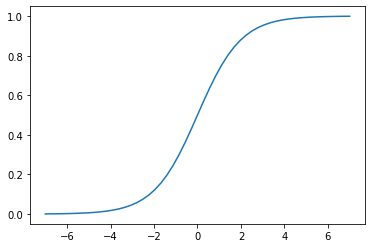

In [183]:
plt.plot(z, sigmoid(z))

so that is how we can make any range of values to values between 0 and 1

So Z - is score and then convert to probability by SIGMOID function

In [184]:
def linear_regression(xi, w0, w):
    result = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [185]:
# Logistic Regression:
def linear_regression(xi, w0, w):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)

    return result

So, the Models are very similar, and they Both are called Linear,  
- they both use dot_product opeator  - *Linear Operator*

Linear Models are good:
- they are fast

# Train Logistic Regression Model

- Train a model with Scikit-Learn  
- Apply it to the validation dataset (make predictions)
- Calculate the Accuracy

In [186]:
from sklearn.linear_model import LogisticRegression

In [187]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\z004ejty\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [188]:
# bias term:
model.intercept_[0]

-0.10918840348733709

In [189]:
# other coefficients:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

In [190]:
# Hard predictions
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

Hard predictions - we already have exect label (churn or not churn) we do not know the certain of the predictions

In [191]:
model.predict_proba(X_train)


array([[0.90456611, 0.09543389],
       [0.32022857, 0.67977143],
       [0.36596174, 0.63403826],
       ...,
       [0.4682605 , 0.5317395 ],
       [0.95757608, 0.04242392],
       [0.30083808, 0.69916192]])

2 columns - 2 probabilities (1st column - probabilities that the object belongs to the 1st calss (not churn), 2nd column - probability that the object belongs to the 2nd class)

therefore we need only 2nd column:

In [192]:
y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([0.00896588, 0.20420492, 0.211922  , ..., 0.13621652, 0.80017529,
       0.83780414])

so now we have probabilities (soft predictions), and now it is up to us how to decide, which objects should be considered as Churn

In [193]:
# churn decision based on probability:
churn_decision = (y_pred >= 0.5)
churn_decision

array([False, False, False, ..., False,  True,  True])

In [194]:
# so these are clients that we think are going to churn and we can make discounts for them
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 312, dtype: object

In [195]:
# how accurate our predictions are:
y_val # true values
churn_decision.astype(int) # our predictions, so we can check how many of them match

array([0, 0, 0, ..., 0, 1, 1])

In [196]:
# true if match and false if do not
(y_val == churn_decision)

array([ True,  True,  True, ...,  True,  True,  True])

In [197]:
# now we can use mean to calculate the Accuracy:
(y_val == churn_decision).mean()

0.8026969481902059

In [198]:
# 
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [199]:
df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

In [200]:
df_pred

,probability,prediction,actual,correct
0,0.008966,0,0,True
1,0.204205,0,0,True
2,0.211922,0,0,True
3,0.543291,1,1,True
4,0.213495,0,0,True
...,...,...,...,...
1404,0.313788,0,0,True
1405,0.039286,0,1,False
1406,0.136217,0,0,True
1407,0.800175,1,1,True


In [201]:
df_pred['correct'].mean()

0.8026969481902059

# Model Interpretation

- what coefficients mean for model
- train smaller model with fewer features

In [202]:
dv.feature_names_

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [203]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.082,
       -0.034, -0.073, -0.336,  0.317, -0.089,  0.004, -0.258,  0.142,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.285, -0.232,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.071, -0.059,  0.142,
       -0.249,  0.216, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.214, -0.089, -0.232, -0.07 ,  0.   ])

so we have weights and feature names from the DictVectorizer, and if we Join them together, we can know what coefficients are used for what features later in the model

In [204]:
# for joining them we can use zip function:
a = [1,2,3,4]
b = 'abcd'
list(zip(a,b))

[(1, 'a'), (2, 'b'), (3, 'c'), (4, 'd')]

In [205]:
# we can also turn the result into a dictionary:
dict(zip(a, b)) # elements from list a become keys and all el from string b becomes values

{1: 'a', 2: 'b', 3: 'c', 4: 'd'}

In [206]:
dict(zip(dv.get_feature_names(), model.coef_[0].round(3)))

C:\Users\z004ejty\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'contract=month-to-month': 0.475,
 'contract=one_year': -0.175,
 'contract=two_year': -0.408,
 'dependents=no': -0.03,
 'dependents=yes': -0.078,
 'deviceprotection=no': 0.063,
 'deviceprotection=no_internet_service': -0.089,
 'deviceprotection=yes': -0.082,
 'gender=female': -0.034,
 'gender=male': -0.073,
 'internetservice=dsl': -0.336,
 'internetservice=fiber_optic': 0.317,
 'internetservice=no': -0.089,
 'monthlycharges': 0.004,
 'multiplelines=no': -0.258,
 'multiplelines=no_phone_service': 0.142,
 'multiplelines=yes': 0.009,
 'onlinebackup=no': 0.063,
 'onlinebackup=no_internet_service': -0.089,
 'onlinebackup=yes': -0.081,
 'onlinesecurity=no': 0.266,
 'onlinesecurity=no_internet_service': -0.089,
 'onlinesecurity=yes': -0.285,
 'paperlessbilling=no': -0.232,
 'paperlessbilling=yes': 0.124,
 'partner=no': -0.166,
 'partner=yes': 0.058,
 'paymentmethod=bank_transfer_(automatic)': -0.087,
 'paymentmethod=credit_card_(automatic)': -0.032,
 'paymentmethod=electronic_check': 0.071,


to have a better understanding what is happening inside of training the model, we can try to train a smaller model (3 features)

In [207]:
small = ['contract', 'tenure', 'monthlycharges']

In [208]:
df_train[small].iloc[:5].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1}]

In [209]:
dicts_train_small = df_train[small].to_dict(orient='records')
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dicts_train_small)

DictVectorizer(sparse=False)

In [210]:
list(dv_small.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'monthlycharges',
 'tenure']

In [211]:
X_train_small = dv_small.transform(dicts_train_small)

In [212]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [213]:
w0 = model_small.intercept_[0]
w = model_small.coef_[0]
print(f'Intercept = {w0}')
print(f'Coefficients: {w}')

Intercept = -2.476775657399558
Coefficients: [ 0.97004491 -0.02513651 -0.94872202  0.02748236 -0.03618424]


In [214]:
# join small model coefficients with feature names:
dict(zip(dv_small.get_feature_names_out(), w.round(3)))

{'contract=month-to-month': 0.97,
 'contract=one_year': -0.025,
 'contract=two_year': -0.949,
 'monthlycharges': 0.027,
 'tenure': -0.036}

In [215]:
w0

-2.476775657399558

$$ -2.47 + x_1 0.97 + x_2 (-0.025) + x3  (-0.949) + x_4 0.027 + x_5 (-0.036) $$

so this is our model and now let's say that we have customer:  
- Monthly Contract (x1 = 1, x2 = 0, x3 = 0)
- Monthly Charge = 50$/month (x4 = 50)
- Tenure = 5 month (x5 = 5)

$$ -2.47 + 1 * 0.97 + 0 * (-0.025) + 0 * (-0.949) + 50 * 0.027 + 5 * (-0.036) =  $$  
$$ -2.47 + 1 * 0.97 + 50 * 0.027 + 5 * (-0.036) =  $$

What if we do not know anything about our customer (x1,x2,...xn = ): 

In [216]:
sigmoid(-2.47)

0.07798823512936635

we can see that probability that Customer will churn is pretty low (6%) by default

In [217]:
#then we know that user has Monthly type of Contract:
sigmoid(-2.47 + 1*0.97)

0.18242552380635632

So the Probability becomes a little bit higher (15%)

In [218]:
# then we learn that the customer pays 50$/month:
sigmoid(-2.47 + 1*0.97 + 50*0.027)

0.46257015465625034

now the P becomes much higher (40%)

In [219]:
# then we learn that customer has 5 month Tenure:
sigmoid(-2.47 + 1*0.97 + 50*0.027 + 5*(-0.036))

0.41824062315816374

now we see that User is less likely to Churn, since the longer user with us the less likely to Churn

In [220]:
# the Raw score:
-2.47 + 1*0.97 + 50*0.027 + 5*(-0.036)

-0.3300000000000001

In [221]:
# Probability Score:
sigmoid(_) # the last output from the cell

0.41824062315816374

In [222]:
# now lets' test 2-year contract user who has been 2 years with the company and pays 30$:
-2.47 + (-0.949) + 30 * 0.027 + 24 * (-0.036)

-3.473

So, the hard score is negative, meaning that the probability would be less than 50%

In [223]:
sigmoid(_)

0.030090303318277657

# Using the model

When we want to use the model, we should Train the final model (df_full_train) and test it on the Test Dataset:

In [231]:
# prepare full_train dataset:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)
y_full_train = df_full_train['churn'].values
# test data:
dict_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dict_test)

# fit the model:
model = LogisticRegression(max_iter = 10000)
model.fit(X_full_train, y_full_train)
# make predictions on the Test dataset:
y_pred = model.predict_proba(X_test)[:, 1] # take probabilities and only 2nd column (P of churn)
# make decisions:
chrun_decision = (y_pred >= 0.5)
# compare churn decision with the Real values:
correctness = chrun_decision == y_test
# calculate accuracy:
test_accuracy = correctness.mean()
print(f'accuracy on test data = {round(test_accuracy, 3)}')

accuracy on test data = 0.815


the accuracy is a little higher, than the one we had on the Validation dataset, which is fine  
it would be also ok if we had a slightly lower accuracy  
What we want to avoid is the situation, when we have a very large difference

Now we can use our model

let's imagine that we deployed our model and now we are asked to give a prediction to the following client:  
for example we have a Server and some sort of Web Service and this service transfers info about our clients to out model API:

In [234]:
customer = dict_test[10]
customer

{'gender': 'male',
 'seniorcitizen': 1,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'no',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'mailed_check',
 'tenure': 32,
 'monthlycharges': 93.95,
 'totalcharges': 2861.45}

In [236]:
# we want to compute the score for this customer:
# feature matrix production for our model:
X_customer = dv.transform(customer)
X_customer

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 9.39500e+01, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 3.20000e+01, 2.86145e+03]])

In [237]:
X_customer.shape

(1, 45)

In [240]:
model.predict_proba(X_customer)[: , 1]

array([0.4056811])

40 % Probability to churn

In [241]:
# what was the real data:
y_test[10]

0

Now let's test on user that actually was going to churn

In [242]:
# customer:
customer = dict_test[-1]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'yes',
 'onlinebackup': 'no',
 'deviceprotection': 'yes',
 'techsupport': 'no',
 'streamingtv': 'yes',
 'streamingmovies': 'yes',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 17,
 'monthlycharges': 104.2,
 'totalcharges': 1743.5}

In [243]:
X_customer = dv.transform(customer)
X_customer

array([[1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0420e+02, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.7000e+01, 1.7435e+03]])

In [247]:
probability_churn = model.predict_proba(X_customer)[:, 1][0] * 100
real_churn_status = y_test[-1]
print(f'Probability from model = {round(probability_churn, 3)} %')
if real_churn_status == 1:
    print('User was Actually going to churn')
elif real_churn_status == 0:
    print('User was Actually Not going to churn')

Probability from model = 59.689 %
User was Actually going to churn


so the prediction of the model was correct in that particular case

# Answering More Questions

- what if we try to exclude the least useful features

In [251]:
# correlation between numerical variables and Churn:
df_full_train[numerical].corrwith(df_full_train['churn']).abs()

tenure            0.351885
monthlycharges    0.196805
totalcharges      0.196353
dtype: float64

We will include all numerical varibale, since they have some correlation with the Target variable

In [263]:
mi.sort_values(ascending=False)[mi.sort_values(ascending=False) >= 0.015]

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dtype: float64

However, we will use only top 10 categorical features

In [267]:
categorical_top = list(mi.sort_values(ascending=False)[mi.sort_values(ascending=False) >= 0.015].index)

In [285]:
# prepare dataset:
# train data:
dicts_train = df_train[categorical_top + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
#validation data:
dicts_val = df_val[categorical_top + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)


# model training:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
#make predictions:
pred_probabilities = model.predict_proba(X_val)[:, 1]
# make decisions:
y_pred = (pred_probabilities >= 0.5).astype(int)
# calculate Accuracy:
accuracy = (y_pred == y_val).mean()
print(f'accuracy = {round(accuracy * 100, 2)} %')

accuracy = 80.13 %


The accuracy did not changed significantly

What if we take only top 5 Categorical variables?

In [291]:
# top 5 categorical variables:
categorical_top = list(mi.sort_values(ascending=False).head(5).index)

# prepare dataset:
# train data:
dicts_train = df_train[categorical_top + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
#validation data:
dicts_val = df_val[categorical_top + numerical].to_dict(orient='records')
X_val = dv.transform(dicts_val)


# model training:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
#make predictions:
pred_probabilities = model.predict_proba(X_val)[:, 1]
# make decisions:
y_pred = (pred_probabilities >= 0.5).astype(int)
# calculate Accuracy:
accuracy = (y_pred == y_val).mean()
print(f'accuracy = {round(accuracy * 100, 2)} %')

accuracy = 78.92 %


So the accuracy decreased, which is logical, since we lost some useful information about the users, however the number of data used for modeling is reduced significantly (about 2 times less data required), but the model's accuracy is similar, therefore if we would have some Memory or similar limitations, this approach may be useful